<a href="https://colab.research.google.com/github/Pawan12345kr/AspireNex/blob/main/Spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : **Pawan Kumar**

---


Email: **pawan8271kr@gmail.com**

In [ ]:
import numpy as np
import pandas as pd

# **Data Exploration**

In [ ]:
data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data = data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
len(data)

5572

In [ ]:
data_encoded= pd.get_dummies(data,columns=["v1"])

In [ ]:
data_encoded.head()

,v2,v1_ham,v1_spam
0,"Go until jurong point, crazy.. Available only ...",True,False
1,Ok lar... Joking wif u oni...,True,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,False,True
3,U dun say so early hor... U c already then say...,True,False
4,"Nah I don't think he goes to usf, he lives aro...",True,False


In [ ]:
data_encoded=data_encoded.drop(columns=["v1_ham"])

In [ ]:
data_encoded.head()

,v2,v1_spam
0,"Go until jurong point, crazy.. Available only ...",False
1,Ok lar... Joking wif u oni...,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,True
3,U dun say so early hor... U c already then say...,False
4,"Nah I don't think he goes to usf, he lives aro...",False


In [ ]:
import re

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=True)
X = vectorizer.fit_transform(data_encoded["v2"])
print(X.shape)

(5572, 8672)


In [ ]:
from sklearn.model_selection import train_test_split
y=data_encoded["v1_spam"]
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# **Naive-Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# TRAIN THE MULTINOMIAL NAIVE BAYES CLASSIFIER
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# MAKE PREDICTIONS ON THE VALIDATION SET
y_pred_nb = nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# EVALUATE THE MODEL ON THE TEST SET
accuracy_val_nb = accuracy_score(y_test, y_pred_nb)
print("Validation Accuracy:", accuracy_val_nb)
print("Validation Classification Report:")
print(classification_report(y_test, y_pred_nb, zero_division=0))

Validation Accuracy: 0.9623318385650225
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       965
        True       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [ ]:
logistic.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lg = logistic.predict(x_test)

In [ ]:
# EVALUATE THE MODEL ON THE TEST SET
accuracy_val_lg = accuracy_score(y_test, y_pred_lg)
print("Validation Accuracy:", accuracy_val_lg)
print("Validation Classification Report:")
print(classification_report(y_test, y_pred_lg, zero_division=0))

Validation Accuracy: 0.9623318385650225
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       965
        True       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



# **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_svc = svc.predict(x_test)

In [ ]:
accuracy_val_svc = accuracy_score(y_test, y_pred_svc)
print("Validation Accuracy:", accuracy_val_svc)
print("Validation Classification Report:")
print(classification_report(y_test, y_pred_svc, zero_division=0))

Validation Accuracy: 0.9766816143497757
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       965
        True       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# **XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier(random_state=42)

In [ ]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(x_test)

In [ ]:
accuracy_val_xgb = accuracy_score(y_test, y_pred_xgb)
print("Validation Accuracy:", accuracy_val_xgb)
print("Validation Classification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

Validation Accuracy: 0.9820627802690582
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       965
        True       0.98      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# **Accuracy comparison**

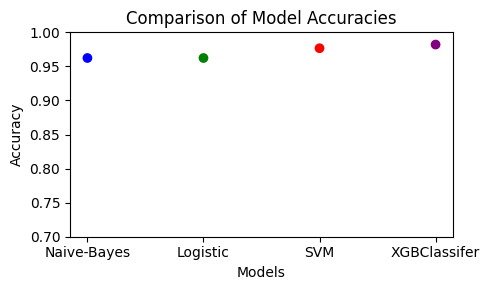

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive-Bayes', 'Logistic', 'SVM', 'XGBClassifer']
accuracies = [accuracy_val_nb, accuracy_val_lg, accuracy_val_svc, accuracy_val_xgb]

# Plotting the bar graph
plt.figure(figsize=(5,3))
plt.scatter(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.7, 1.0)  # Adjust ylim if needed

# Display the plot
plt.tight_layout()
plt.show()